In [17]:
import urllib.request
import datetime
import json
import ssl
import json
import re
# Okt , 한글 품사 태깅하기위한 모듈, 도구.
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager
from wordcloud import WordCloud


client_id = 'OfUhh9NpmXzZeWhUNB8H'
client_secret = 'jECI0GhNyV'

def getRequestUrl(url):
    # Create an SSL context to handle SSL verification
    context = ssl.create_default_context()
    context.check_hostname = False
    context.verify_mode = ssl.CERT_NONE

    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)

    try:
        # Pass the context to the urlopen function to handle SSL
        response = urllib.request.urlopen(req, context=context)
        if response.getcode() == 200:
            print("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')

    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

In [18]:
#[CODE 2]
def getNaverSearch(node, srcText, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" %(urllib.parse.quote(srcText), start, display)
    url = base + node + parameters
    responseDecode = getRequestUrl(url) #[CODE 1]
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)


In [19]:
#[CODE 3]
def getPostData(post, jsonResult, cnt):
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']
    pDate = datetime.datetime.strptime(post['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')
    jsonResult.append({'cnt':cnt, 'title':title, 'description': description,
    'org_link':org_link, 'link': link, 'pDate':pDate})
    return

In [20]:
import os
import json

def main():
    node = 'news'  # 크롤링할 대상
    srcText = input('검색어를 입력하세요: ')  # 예: 포메라니안
    cnt = 0
    jsonResult = []
    jsonResponse = getNaverSearch(node, srcText, 1, 100)  # [CODE 2]
    total = jsonResponse['total']
    while jsonResponse is not None and jsonResponse['display'] != 0:
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post, jsonResult, cnt)  # [CODE 3]
        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100)  # [CODE 2]

    print('전체 검색 : %d 건' % total)

    # 저장할 경로 설정 (예: ./data/ 폴더에 저장)
    save_dir = "./file"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)  # 폴더가 없으면 생성

    # 파일 저장 경로
    outputFileName = f"{save_dir}/{srcText}_naver_{node}.json"

    with open(outputFileName, 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult, indent=4, sort_keys=True, ensure_ascii=False)
        outfile.write(jsonFile)

    print(f"가져온 데이터 : {cnt} 건")
    print(f"{outputFileName} SAVED")

if __name__ == '__main__':
    main()

[2025-03-04 14:35:13.950845] Url Request Success
[2025-03-04 14:35:14.148142] Url Request Success
[2025-03-04 14:35:14.428725] Url Request Success
[2025-03-04 14:35:14.689711] Url Request Success
[2025-03-04 14:35:15.002625] Url Request Success
[2025-03-04 14:35:15.221502] Url Request Success
[2025-03-04 14:35:15.449952] Url Request Success
[2025-03-04 14:35:15.693094] Url Request Success
[2025-03-04 14:35:15.936160] Url Request Success
[2025-03-04 14:35:16.188536] Url Request Success
HTTP Error 400: Bad Request
[2025-03-04 14:35:16.277409] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%ED%8F%AC%EB%A9%94%EB%9D%BC%EB%8B%88%EC%95%88&start=1001&display=100
전체 검색 : 10324 건
가져온 데이터 : 1000 건
./file/포메라니안_naver_news.json SAVED


In [21]:
# 샘플 데이터 읽어서, 메모리에서 확인해보기.
# inputFileName = "./etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명.json"
inputFileName = f"./file/포메라니안_naver_news.json"
data = json.loads(open(inputFileName,"r",encoding = "utf-8").read())
data

[{'cnt': 1,
  'description': '현재 분양 중인 강아지 품종은 말티푸, 미니 비숑프리제, 토이푸들, <b>포메라니안</b> 등 인기 견종을 포함해 웰시코기, 시바이누, 치와와, 시츄 등 특수 견종까지 다양하다. 고양이 품종으로는 먼치킨, 브리티쉬숏헤어, 렉돌... ',
  'link': 'https://www.gpkorea.com/news/articleView.html?idxno=125745',
  'org_link': 'https://www.gpkorea.com/news/articleView.html?idxno=125745',
  'pDate': '2025-03-04 14:00:00',
  'title': "대구 강아지·고양이 분양 전문 '미유펫 대구점', 신규 매장 '대구펫' 오..."},
 {'cnt': 2,
  'description': '경기 성남 태평동 7068-6에서 발견 구조한 암컷 <b>포메라니안</b>이 03일 동물보호소에 들어왔다. 흰색 <b>포메라니안</b>은 몸무게 3.85Kg에 2015년생으로 추정된다. 어금니 2개 제외 치아없음, 코 까짐, 유선종양... ',
  'link': 'https://www.notepet.co.kr/news/abandon/abandon_view/?idx=343640',
  'org_link': 'https://www.notepet.co.kr/news/abandon/abandon_view/?idx=343640',
  'pDate': '2025-03-04 11:26:00',
  'title': '경기 성남 태평동에서 <b>포메라니안</b> 발견 보호'},
 {'cnt': 3,
  'description': '특히 온몸의 털이 빠진 채 발견된 강아지(<b>포메라니안</b>)가 힘든 수술과 재활을 견디고 새 가족을 만나 감동을 전했다. 이 구청장은 “서대문 내품애센터에 많은 분들의 관심과 방문을 기대한다”라고 말했다. 서대문... ',
  'link': 'https://n.news.naver.

In [22]:
# 해당 데이터에서, 기사 내용인 , message 부분의 값 추출 작업.
# 임시 저장 문자열
message = ""
# data = [{딕션너리1},{딕션너리2},{딕션너리3},...]
for item in data:
  # if "message" in item.keys():
  if "description" in item.keys():
    # (\w : 문자, 숫자 의미 ) 앞에 ^(not) 가 아닌 것은 모두 -> 공백으로 변경함.
    # 하나의 임시 메세지 문자열 변수에 담기
    message = message + re.sub(r"[^\w]"," ", item["description"]) + ""
    # message = message + re.sub(r"[^\w]"," ", item["message"]) + ""
message

'현재 분양 중인 강아지 품종은 말티푸  미니 비숑프리제  토이푸들   b 포메라니안  b  등 인기 견종을 포함해 웰시코기  시바이누  치와와  시츄 등 특수 견종까지 다양하다  고양이 품종으로는 먼치킨  브리티쉬숏헤어  렉돌    경기 성남 태평동 7068 6에서 발견 구조한 암컷  b 포메라니안  b 이 03일 동물보호소에 들어왔다  흰색  b 포메라니안  b 은 몸무게 3 85Kg에 2015년생으로 추정된다  어금니 2개 제외 치아없음  코 까짐  유선종양    특히 온몸의 털이 빠진 채 발견된 강아지  b 포메라니안  b  가 힘든 수술과 재활을 견디고 새 가족을 만나 감동을 전했다  이 구청장은  서대문 내품애센터에 많은 분들의 관심과 방문을 기대한다 라고 말했다  서대문    손인규 기자 치치는  b 포메라니안  b  믹스견이다  추정되는 나이는 8세다  사람 나이로 치면 노인에 해당한다  거기에 여러 질환까지 앓고 있어 입양은 꿈도 못 꿨다  하지만 센터 직원들은 치치를 힘닿는 데까지 돕기로 했다     1 3층 300평의 규모가 큰 곳인 만큼  b 포메라니안  b   말티푸  미니비숑프리제분양을 전문으로 푸들 말티즈 등 소형견은 물론  중형견 및 대형견까지 한곳에서 다양한 강아지들을 만나볼수있고  견종별에 따른 담당자들에게    제가 티를 안내서 그렇지 많이 속상했다 quot 며  quot 왜냐면 우리 그레이튼이  b 포메라니안  b 이지 않나   b 포메라니안  b 이 기관지가 안좋다 원래  기관지 협착증이 굉장히 잘 오는 종 quot 이라고 털어놨다  이어  quot 우리 그레이튼도 기관지    이어  quot 그레이튼의 종이  b 포메라니안  b 인데   b 포메라니안  b 은 원래 기관지가 안 좋아 기관지협착증이 잘 오는 종이다  그레이튼도 기관지협착증이 있어서 2022년부터 약을 먹고 있었다  스탠스까지 넣었는데 시술이 잘못됐다     소형견 중에서는 몰티즈   b 포메라니안  b   요크셔테리어  푸들  비숑 등에게서 자주 발생한다 

In [23]:
# 품사 태깅, Okt 패키지 사용하기.
nlp = Okt()
message_N = nlp.nouns(message)
message_N


['현재',
 '분양',
 '중인',
 '강아지',
 '품종',
 '말티',
 '미니',
 '비숑프리제',
 '토이',
 '포메라니안',
 '등',
 '인기',
 '견종',
 '포함',
 '웰시코기',
 '시바이누',
 '치와와',
 '시츄',
 '등',
 '특수',
 '견종',
 '고양이',
 '품종',
 '먼치킨',
 '브리티쉬숏헤어',
 '렉돌',
 '경기',
 '성남',
 '태평동',
 '발견',
 '구조',
 '암컷',
 '포메라니안',
 '이',
 '동물보호',
 '소',
 '흰색',
 '포메라니안',
 '은',
 '몸무게',
 '추정',
 '어금니',
 '개',
 '제외',
 '치아',
 '코',
 '짐',
 '유선',
 '종양',
 '온몸',
 '털',
 '채',
 '발견',
 '강아지',
 '포메라니안',
 '수술',
 '재활',
 '새',
 '가족',
 '감동',
 '전',
 '이',
 '청장',
 '서대문',
 '품애',
 '센터',
 '분',
 '관심',
 '방문',
 '말',
 '서대문',
 '손',
 '규',
 '기자',
 '치치',
 '포메라니안',
 '믹스견',
 '추정',
 '나이',
 '사람',
 '나이',
 '치면',
 '노인',
 '해당',
 '거기',
 '여러',
 '질환',
 '입양',
 '꿈',
 '못',
 '센터',
 '직원',
 '치치',
 '힘',
 '데',
 '돕기',
 '층',
 '평의',
 '규모',
 '곳',
 '만큼',
 '포메라니안',
 '말티',
 '미니',
 '비숑프리제',
 '분양',
 '전문',
 '말티즈',
 '등',
 '소형견',
 '중형',
 '견',
 '및',
 '대형견',
 '곳',
 '강아지',
 '견종별',
 '담당자',
 '제',
 '티',
 '안내서',
 '며',
 '왜냐면',
 '우리',
 '그레이',
 '포메라니안',
 '이지',
 '포메라니안',
 '이',
 '기관지',
 '원래',
 '기관지',
 '협착증',
 '종',
 '우리',
 '그레이',
 '기관지',
 '그레이',

In [24]:
# 임시 딕션너리에 담아서, 필요한 부분 추출해서 조사.
word_count = dict()

# 집계 데이터 기본 탐색, 모델 구축 하기.
count = Counter(message_N)

# 상위 80개 정도
for tag, counts in count.most_common(80):
  if len(str(tag))>1:
    word_count[tag] = counts
    # print(f" tag : {tag}, counts : {counts}")

word_count# 집계 데이터 기본 탐색, 모델 구축 하기.
count = Counter(message_N)
count

Counter({'포메라니안': 1391,
         '이': 432,
         '은': 304,
         '등': 298,
         '강아지': 295,
         '발견': 290,
         '추정': 283,
         '구조': 282,
         '반려견': 274,
         '소': 271,
         '동물보호': 266,
         '몸무게': 266,
         '말티즈': 211,
         '수컷': 161,
         '흰색': 156,
         '암컷': 137,
         '소형견': 137,
         '품종': 133,
         '반려동물': 132,
         '위': 126,
         '견종': 125,
         '기한': 122,
         '분양': 100,
         '이름': 100,
         '것': 97,
         '순찰': 91,
         '가장': 90,
         '의': 87,
         '중': 81,
         '반려': 81,
         '몰티즈': 80,
         '를': 80,
         '믹스견': 78,
         '갈색': 77,
         '인기': 76,
         '말티': 74,
         '수': 73,
         '시츄': 72,
         '활동': 72,
         '세': 68,
         '사람': 67,
         '씨': 67,
         '호두': 67,
         '개': 66,
         '견': 66,
         '살': 64,
         '마리': 64,
         '고양이': 63,
         '달서구': 62,
         '리트리버': 61,
         '종': 60,
    

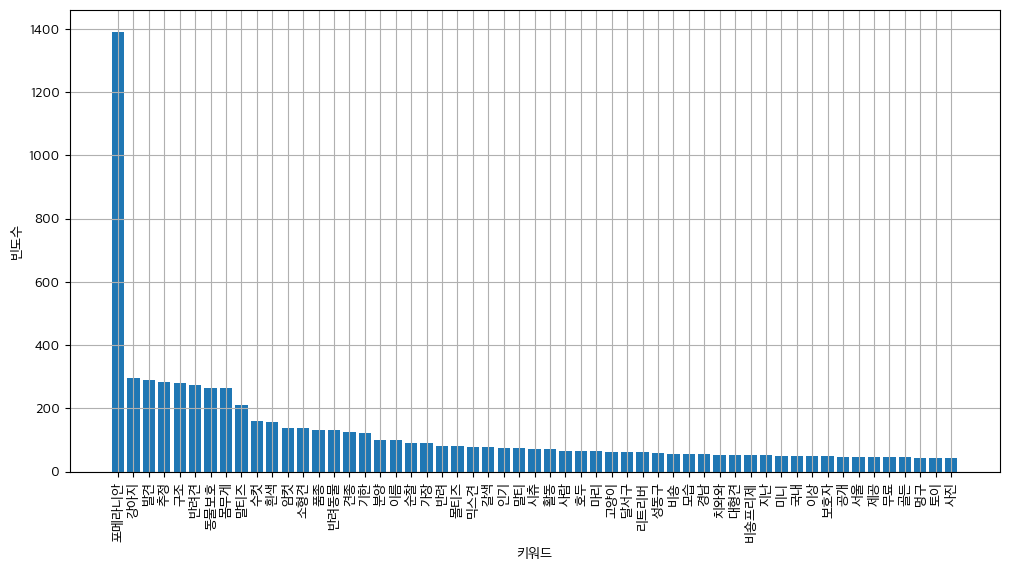

In [25]:
# 시각화1, 막대 그래프
# 폰트 임포트 , 메모리에 설정
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family = font_name)

#, x축, y축, 가로x세로 비율, x 라벨, 폰트 설정 등
plt.figure(figsize=(12,6))
plt.xlabel("키워드")
plt.ylabel("빈도수")
plt.grid(True)

# 딕션너리의 키, 값 , 정렬 내림차순
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(),reverse=True)

# 막대 그래프 그리기.
plt.bar(range(len(word_count)), sorted_Values, align="center")

# x 축 라벨 설정.
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = "vertical")

plt.show()

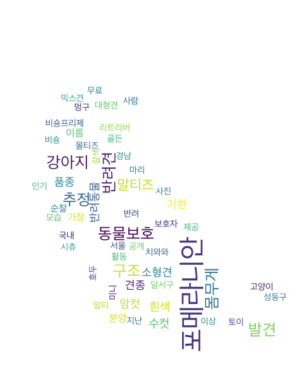

In [26]:
# 시각화2, 워드 클라우드
import numpy as np

from PIL import Image

alice_mask = np.array(Image.open("file/haru-sh.png"))

# 실행시, 한글이 깨져서, 해당 폰트 패스 경로 지정 필요.
wc = WordCloud(font_path, background_color="white", max_words=1000, mask=alice_mask,width=800,height=1000)
# generate word cloud
sampleImage = wc.generate_from_frequencies(word_count)

# show
plt.imshow(sampleImage, interpolation="bilinear")
# plt.imshow(sampleImage)

plt.axis("off")
plt.show()
 # 해당 출력을 이미지로 저장 하기.
sampleImage.to_file(inputFileName + "_cloud.jpg")